## PERCEPTRON

### A perceptron is a neural network unit (an artificial neuron) that does certain computations to detect features or business intelligence in the input data

### Importing the libraries

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Creating perceptron model

In [5]:
# perceptron class and declare certain parameters such as learning rate
# (to keep track of the updations in weights), epochs(iterations) and random state 
# and the constructor is defined to initialize the variables
class Perceptron(object):
    def __init__(self, learning_rate=0.01, n_iter=100, random_state=1):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.random_state = random_state
# The fit method is for mapping the training data inputs(X) with training labels or targets(y). 
# This method will call the other two functions internally.
# All the necessary calculations take place here
    def fit(self, X, y):
        rand = np.random.RandomState(self.random_state)
        self.weights = rand.normal(loc=0.0, scale=0.01, size=1 +  X.shape[1])
        self.errors_ = []
    
        for _ in range(self.n_iter):
            errors = 0
            for x, target in zip(X, y):
                update = self.learning_rate * (target - self.predict(x))
                self.weights[1:] += update * x
                self.weights[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self  

    def net_input(self, X):
        z = np.dot(X, self.weights[1:]) + self.weights[0]
        return z

    def predict(self, X):
        return np.where(self.net_input(X) >= 0, 1, -1)

### Load a dataset and check predictions

In [27]:
df = pd.read_csv('pima-indians-diabetes.csv', header=None)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

### Train Test split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Train using the perceptron model

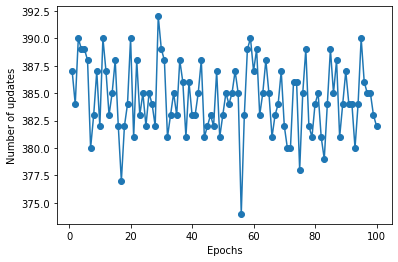

In [30]:
per = Perceptron(learning_rate=0.1, n_iter=100, random_state=1)
per.fit(X_train, y_train)
plt.plot(range(1, len(per.errors_) + 1), per.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

 Plot shows variation of the algorithm of how it has learnt with each epoch

### Predicting for test data

In [31]:
y_pred = per.predict(X_test)

In [32]:
y_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [33]:
accuracy_score(y_test, y_pred)

0.33858267716535434